In [1]:
%pylab inline
import hashlib
from itertools import groupby
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget https://storage.googleapis.com/models.cdn.sourced.tech/legacy/profiles.pickle

--2017-09-20 08:15:19--  https://storage.googleapis.com/models.cdn.sourced.tech/legacy/profiles.pickle
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.210.176, 2a00:1450:4003:806::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.210.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2083670692 (1.9G) [application/octet-stream]
Saving to: ‘profiles.pickle’

profiles.pickle     100%[===================>]   1.94G  36.3MB/s    in 56s     

2017-09-20 08:16:16 (35.3 MB/s) - ‘profiles.pickle’ saved [2083670692/2083670692]



In [3]:
with open("profiles.pickle", "rb") as fin:
    devs, repo_index, grid_jv, assignments = pickle.load(fin)
    
def hash_email(email):
    m = hashlib.sha256()
    m.update(b"sourced")
    m.update(email.encode("utf-8"))
    return m.digest()

def draw_profile(email):
    my_repos = devs[hash_email(email)]
    my_repos = [(repo_index[r[0]], r[1]) for r in my_repos if r[0] in repo_index]
    my_clusters = [(assignments[r[0]], r[1]) for r in my_repos]
    my_clusters = [[k, sum(c[1] for c in g)] for k, g in groupby(sorted(my_clusters), lambda c: c[0])]
    # two clusters were pushed away during kmcuda k-means, we have to adjust the indices
    for c in my_clusters:
        if c[0] > 1742:
            c[0] -= 2
        elif c[0] > 1414:
            c[0] -= 1
            
    profile = zeros((54, 54), dtype=float32)
    for c in my_clusters:
        profile[tuple((grid_jv[c[0]] * (54 - 1)).astype(int))] = c[1]
    imshow(profile, interpolation="nearest", cmap="Blues")
    title("%s profile in the topic space" % email)

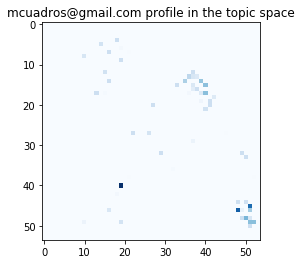

In [4]:
draw_profile("mcuadros@gmail.com")